## 2.4 卷积神经网络简介
卷积神经网络由一个或多个卷积层和顶端的全连通层（也可以使用1x1的卷积层作为最终的输出）组成一种前馈神经网络。一般的认为，卷积神经网络是由Yann LeCun大神在1989年提出的LeNet中首先被使用，但是由于当时的计算能力不够，并没有得到广泛的应用，到了1998年Yann LeCun及其合作者构建了更加完备的卷积神经网络LeNet-5并在手写数字的识别问题中取得成功，LeNet-5的成功使卷积神经网络的应用得到关注。LeNet-5沿用了LeCun (1989) 的学习策略并在原有设计中加入了池化层对输入特征进行筛选 。LeNet-5基本上定义了现代卷积神经网络的基本结构，其构筑中交替出现的卷积层-池化层被认为有效提取了输入图像的平移不变特征，使得对于特征的提取前进了一大步，所以我们一般的认为，Yann LeCun是卷积神经网络的创始人。

2006年后，随着深度学习理论的完善，尤其是计算能力的提升和参数微调（fine-tuning）等技术的出现，卷积神经网络开始快速发展，在结构上不断加深，各类学习和优化理论得到引入，2012年的AlexNet、2014年的VGGNet、GoogLeNet 和2015年的ResNet,使得卷积神经网络几乎成为了深度学习中图像处理方面的标配。

## 2.4.1 为什么要用卷积神经网络
对于计算机视觉来说，每一个图像是由一个个像素点构成，每个像素点有三个通道，分别代表RGB三种颜色(不计算透明度)，我们以手写识别的数据集MNIST举例，每个图像的是一个长宽均为28，channel为1的单色图像，如果使用全连接的网络结构，即，网络中的神经与相邻层上的每个神经元均连接，那就意味着我们的网络有28 28 =784个神经元（RGB3色的话还要3），hidden层如果使用了15个神经元，需要的参数个数(w和b)就有：28 28 15 * 10 + 15 + 10=117625个，这个数量级到现在为止也是一个很恐怖的数量级，一次反向传播计算量都是巨大的，这还展示一个单色的28像素大小的图片，如果我们使用更大的像素，计算量可想而知。

## 2.4.2结构组成
上面说到传统的网络需要大量的参数，但是这些参数是否重复了呢，例如，我们识别一个人，只要看到他的眼睛，鼻子，嘴，还有脸基本上就知道这个人是谁了，只是用这些局部的特征就能做做判断了，并不需要所有的特征。 另外一点就是我们上面说的可以有效提取了输入图像的平移不变特征，就好像我们看到了这是个眼睛，这个眼镜在左边还是在右边他都是眼睛，这就是平移不变性。 我们通过卷积的计算操作来提取图像局部的特征，每一层都会计算出一些局部特征，这些局部特征再汇总到下一层，这样一层一层的传递下去，特征由小变大，最后在通过这些局部的特征对图片进行处理，这样大大提高了计算效率，也提高了准确度。

卷积层
卷积计算
在介绍卷积层之前要先介绍一下卷积的计算，这里使用知乎上的一张图片

![image](https://github.com/zergtant/pytorch-handbook/raw/8b216098c31c30d081ecbc56fba167fb854d0cdf/chapter2/9.gif)
我们会定义一个权重矩阵，也就是我们说的W（一般对于卷积来说，称作卷积的核kernel也有有人称做过滤器filter），这个权重矩阵的大小一般为3 * 3 或者5 * 5，但是在LeNet里面还用到了比较大的7 * 7，现在已经很少见了，因为根据经验的验证，3和5是最佳的大小。 我们以图上所示的方式，我们在输入矩阵上使用我们的权重矩阵进行滑动，每滑动一步，将所覆盖的值与矩阵对应的值相乘，并将结果求和并作为输出矩阵的一项，依次类推直到全部计算完成。

上图所示，我们输入是一个 5 * 5的矩阵，通过使用一次3 * 3的卷积核计算得到的计算结果是一个3 * 3的新矩阵。 那么新矩阵的大小是如何计算的呢？

### 卷积核大小 f
刚才已经说到了一个重要的参数，就是核的大小，我们这里用f来表示

### 边界填充 (p)adding
我们看到上图，经过计算后矩阵的大小改变了，如果要使矩阵大小不改变呢，我们可以先对矩阵做一个填充，将矩阵的周围全部再包围一层，这个矩阵就变成了7*7,上下左右各加1，相当于 5+1+1=7 这时，计算的结果还是 5 * 5的矩阵，保证了大小不变，这里的p=1

### 步长 (s)tride
从动图上我们能够看到，每次滑动只是滑动了一个距离，如果每次滑动两个距离呢？那就需要使用步长这个参数。

### 计算公式
n为我们输入的矩阵的大小，$ \frac{n-f+2p}{s} +1 $ 向下取整

这个公式非常重要一定要记住

### 卷积层
在每一个卷积层中我们都会设置多个核，每个核代表着不同的特征，这些特征就是我们需要传递到下一层的输出，而我们训练的过程就是训练这些不同的核。

## 激活函数
由于卷积的操作也是线性的，所以也需要进行激活，一般情况下，都会使用relu。

## 池化层（pooling）
池化层是CNN的重要组成部分，通过减少卷积层之间的连接，降低运算复杂程度，池化层的操作很简单，就想相当于是合并，我们输入一个过滤器的大小，与卷积的操作一样，也是一步一步滑动，但是过滤器覆盖的区域进行合并，只保留一个值。 合并的方式也有很多种，例如我们常用的两种取最大值maxpooling，取平均值avgpooling

池化层的输出大小公式也与卷积层一样，由于没有进行填充，所以p=0，可以简化为 $ \frac{n-f}{s} +1 $

## dropout层
dropout是2014年 Hinton 提出防止过拟合而采用的trick，增强了模型的泛化能力 Dropout（随机失活）是指在深度学习网络的训练过程中，按照一定的概率将一部分神经网络单元暂时从网络中丢弃，相当于从原始的网络中找到一个更瘦的网络，说的通俗一点，就是随机将一部分网络的传播掐断，听起来好像不靠谱，但是通过实际测试效果非常好。 有兴趣的可以去看一下原文Dropout: A Simple Way to Prevent Neural Networks from Overfitting这里就不详细介绍了。

## 全连接层
全链接层一般是作为最后的输出层使用，卷积的作用是提取图像的特征，最后的全连接层就是要通过这些特征来进行计算，输出我们所要的结果了，无论是分类，还是回归。

我们的特征都是使用矩阵表示的，所以再传入全连接层之前还需要对特征进行压扁，将他这些特征变成一维的向量，如果要进行分类的话，就是用sofmax作为输出，如果要是回归的话就直接使用linear即可。

以上就是卷积神经网络几个主要的组成部分，下面我们介绍一些经典的网络模型

## 2.4.3 经典模型
### LeNet-5
1998， Yann LeCun 的 LeNet5 官网

卷积神经网路的开山之作，麻雀虽小，但五脏俱全，卷积层、pooling层、全连接层，这些都是现代CNN网络的基本组件

用卷积提取空间特征；
由空间平均得到子样本；
用 tanh 或 sigmoid 得到非线性；
用 multi-layer neural network（MLP）作为最终分类器；
层层之间用稀疏的连接矩阵，以避免大的计算成本。
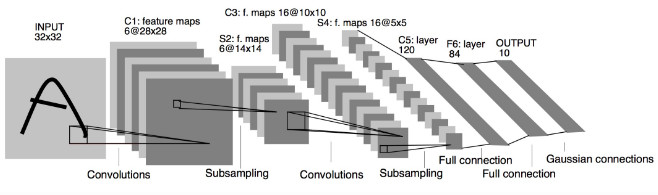
输入：图像Size为3232。这要比mnist数据库中最大的字母(2828)还大。这样做的目的是希望潜在的明显特征，如笔画断续、角点能够出现在最高层特征监测子感受野的中心。

输出：10个类别，分别为0-9数字的概率

1. C1层是一个卷积层，有6个卷积核（提取6种局部特征），核大小为5 * 5
2. S2层是pooling层，下采样（区域:2 * 2 ）降低网络训练参数及模型的过拟合程度。
3. C3层是第二个卷积层，使用16个卷积核，核大小:5 * 5 提取特征
4. S4层也是一个pooling层，区域:2*2
5. C5层是最后一个卷积层，卷积核大小:5 * 5 卷积核种类:120
6. 最后使用全连接层，将C5的120个特征进行分类，最后输出0-9的概率

以下代码来自官方教程

In [3]:
import torch.nn as nn
class LeNet5(nn.Module):

    def __init__(self):
        super(LeNet5, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 这里论文上写的是conv,官方教程用了线性层
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = LeNet5()
print(net)

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## AlexNet
2012，Alex Krizhevsky 可以算作LeNet的一个更深和更广的版本，可以用来学习更复杂的对象 论文

- 用rectified linear units（ReLU）得到非线性；
- 使用 dropout 技巧在训练期间有选择性地忽略单个神经元，来减缓模型的过拟合；
- 重叠最大池，避免平均池的平均效果；
- 使用 GPU NVIDIA GTX 580 可以减少训练时间，这比用CPU处理快了 10 倍，所以可以被用于更大的数据集和图像上。
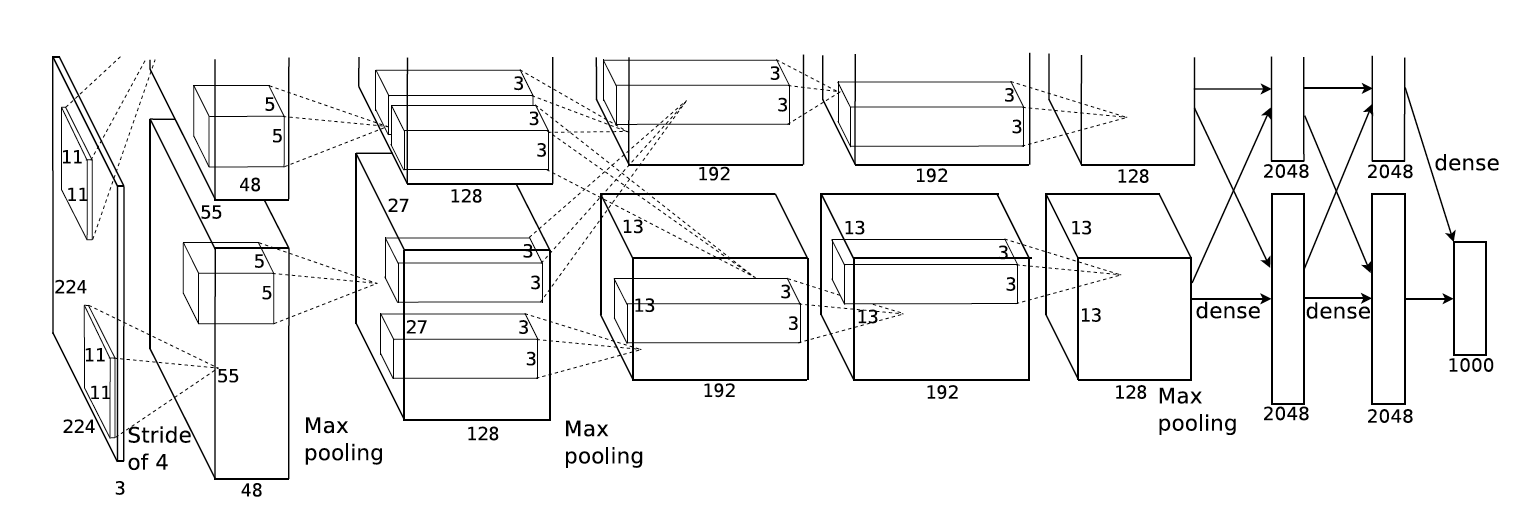

虽然 AlexNet只有8层，但是它有60M以上的参数总量，Alexnet有一个特殊的计算层，LRN层，做的事是对当前层的输出结果做平滑处理，这里就不做详细介绍了， Alexnet的每一阶段（含一次卷积主要计算的算作一层）可以分为8层：
1. con - relu - pooling - LRN ： 要注意的是input层是227*227，而不是paper里面的224，这里可以算一下，主要是227可以整除后面的conv1计算，224不整除。如果一定要用224可以通过自动补边实现，不过在input就补边感觉没有意义，补得也是0，这就是我们上面说的公式的重要性。
2. conv - relu - pool - LRN ： group=2，这个属性强行把前面结果的feature map分开，卷积部分分成两部分做

3. conv - relu

4. conv - relu

5. conv - relu - pool

6. fc - relu - dropout ： dropout层，在alexnet中是说在训练的以1/2概率使得隐藏层的某些neuron的输出为0，这样就丢到了一半节点的输出，BP的时候也不更新这些节点，防止过拟合。

7. fc - relu - dropout

8. fc - softmax

在Pytorch的vision包中是包含Alexnet的官方实现的，我们直接使用官方版本看下网络


In [4]:
import torchvision
model = torchvision.models.alexnet(pretrained=False) #我们不下载预训练权重
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
## VGG
2015，牛津的 VGG。论文

每个卷积层中使用更小的 3×3 filters，并将它们组合成卷积序列
多个3×3卷积序列可以模拟更大的接收场的效果
每次的图像像素缩小一倍，卷积核的数量增加一倍
VGG有很多个版本，也算是比较稳定和经典的model。它的特点也是连续conv多计算量巨大，这里我们以VGG16为例.图片来源